# FordGoBike Dataset Exploration
## by  Harveen Singh

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
sns.set()

## Step 1: Question

When are most trips taken in terms of time of day, day of the week, or month of the year?


How long does the average trip take?


Does the above depend on if a user is a subscriber or customer?

## Step 2: Wrangle

In [2]:

df = pd.read_csv('2017-fordgobike-tripdata.csv' , parse_dates=['start_time', 'end_time'])

In [3]:
list_csv = []
list_csv.append(df)

In [4]:

for i in range(1,6):
    temp = pd.read_csv('20180'+str(i)+'-fordgobike-tripdata.csv' , parse_dates=['start_time', 'end_time'])
    list_csv.append(temp)

In [5]:
master_df = pd.concat(list_csv)

/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [6]:
master_df = master_df.reset_index(drop=True)

In [7]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142896 entries, 0 to 1142895
Data columns (total 16 columns):
bike_id                    1142896 non-null int64
bike_share_for_all_trip    623196 non-null object
duration_sec               1142896 non-null int64
end_station_id             1142896 non-null int64
end_station_latitude       1142896 non-null float64
end_station_longitude      1142896 non-null float64
end_station_name           1142896 non-null object
end_time                   1142896 non-null datetime64[ns]
member_birth_year          1030262 non-null float64
member_gender              1030526 non-null object
start_station_id           1142896 non-null int64
start_station_latitude     1142896 non-null float64
start_station_longitude    1142896 non-null float64
start_station_name         1142896 non-null object
start_time                 1142896 non-null datetime64[ns]
user_type                  1142896 non-null object
dtypes: datetime64[ns](2), float64(5), int64(4), object

In [8]:
df = master_df.copy()

In [9]:
df.tail()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
1142891,2405,No,645,179,37.816073,-122.267886,Telegraph Ave at 27th St,2018-05-01 00:18:09.686,1979.0,Male,186,37.801319,-122.262642,Lakeside Dr at 14th St,2018-05-01 00:07:24.129,Subscriber
1142892,2627,No,135,238,37.871719,-122.273068,MLK Jr Way at University Ave,2018-05-01 00:18:09.537,1986.0,Female,244,37.873792,-122.268618,Shattuck Ave at Hearst Ave,2018-05-01 00:15:53.983,Subscriber
1142893,2664,No,316,45,37.781752,-122.405127,5th St at Howard St,2018-05-01 00:15:20.981,1992.0,Male,30,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2018-05-01 00:10:04.111,Subscriber
1142894,1236,Yes,183,267,37.861804,-122.253569,Derby St at College Ave,2018-05-01 00:15:05.441,1995.0,Male,243,37.869360,-122.254337,Bancroft Way at College Ave,2018-05-01 00:12:01.709,Subscriber
1142895,3887,No,78,107,37.763015,-122.426497,17th St at Dolores St,2018-05-01 00:03:20.359,NaN,NaN,106,37.763242,-122.430675,Sanchez St at 17th St,2018-05-01 00:02:01.852,Subscriber


In [10]:
df.describe()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_station_id,start_station_latitude,start_station_longitude
count,1.142896e+06,1.142896e+06,1.142896e+06,1.142896e+06,1.142896e+06,1.030262e+06,1.142896e+06,1.142896e+06,1.142896e+06
mean,1.935029e+03,9.745475e+02,1.020755e+02,3.776906e+01,-1.223567e+02,1.981197e+03,1.044879e+02,3.776889e+01,-1.223574e+02
std,1.110299e+03,2.994466e+03,9.038306e+01,9.559405e-02,1.140805e-01,1.057641e+01,9.105294e+01,9.570179e-02,1.146149e-01
min,1.000000e+01,6.100000e+01,3.000000e+00,3.731285e+01,-1.224443e+02,1.886000e+03,3.000000e+00,3.731285e+01,-1.224443e+02
25%,9.830000e+02,3.640000e+02,2.600000e+01,3.777331e+01,-1.224107e+02,1.975000e+03,2.800000e+01,3.777241e+01,-1.224117e+02
50%,2.003000e+03,5.710000e+02,7.400000e+01,3.778241e+01,-1.223984e+02,1.984000e+03,7.600000e+01,3.778175e+01,-1.223985e+02
75%,2.838000e+03,8.950000e+02,1.600000e+02,3.779539e+01,-1.223903e+02,1.989000e+03,1.630000e+02,3.779539e+01,-1.223903e+02
max,4.231000e+03,8.636900e+04,3.500000e+02,3.788022e+01,-1.218741e+02,2.000000e+03,3.500000e+02,3.788022e+01,-1.218741e+02


In [11]:
df['member_gender'].fillna(value='Unknown', inplace=True)

In [12]:
df['age'] = 2019 - df.member_birth_year

In [13]:
df.age.describe().apply(lambda x: format(x, 'f'))

count    1030262.000000
mean          37.803249
std           10.576413
min           19.000000
25%           30.000000
50%           35.000000
75%           44.000000
max          133.000000
Name: age, dtype: object

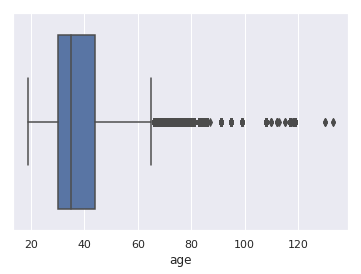

In [14]:
sns.boxplot(df.age)

### As the maximum age is 60 so considering only the maximum age and removing other entries

In [15]:
df =df[df.age<=60]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996192 entries, 0 to 1142894
Data columns (total 17 columns):
bike_id                    996192 non-null int64
bike_share_for_all_trip    559370 non-null object
duration_sec               996192 non-null int64
end_station_id             996192 non-null int64
end_station_latitude       996192 non-null float64
end_station_longitude      996192 non-null float64
end_station_name           996192 non-null object
end_time                   996192 non-null datetime64[ns]
member_birth_year          996192 non-null float64
member_gender              996192 non-null object
start_station_id           996192 non-null int64
start_station_latitude     996192 non-null float64
start_station_longitude    996192 non-null float64
start_station_name         996192 non-null object
start_time                 996192 non-null datetime64[ns]
user_type                  996192 non-null object
age                        996192 non-null float64
dtypes: datetime64[n

In [17]:
df = df[df.end_station_id.isna()== False]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996192 entries, 0 to 1142894
Data columns (total 17 columns):
bike_id                    996192 non-null int64
bike_share_for_all_trip    559370 non-null object
duration_sec               996192 non-null int64
end_station_id             996192 non-null int64
end_station_latitude       996192 non-null float64
end_station_longitude      996192 non-null float64
end_station_name           996192 non-null object
end_time                   996192 non-null datetime64[ns]
member_birth_year          996192 non-null float64
member_gender              996192 non-null object
start_station_id           996192 non-null int64
start_station_latitude     996192 non-null float64
start_station_longitude    996192 non-null float64
start_station_name         996192 non-null object
start_time                 996192 non-null datetime64[ns]
user_type                  996192 non-null object
age                        996192 non-null float64
dtypes: datetime64[n

In [19]:
df.bike_share_for_all_trip.fillna('NA', inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996192 entries, 0 to 1142894
Data columns (total 17 columns):
bike_id                    996192 non-null int64
bike_share_for_all_trip    996192 non-null object
duration_sec               996192 non-null int64
end_station_id             996192 non-null int64
end_station_latitude       996192 non-null float64
end_station_longitude      996192 non-null float64
end_station_name           996192 non-null object
end_time                   996192 non-null datetime64[ns]
member_birth_year          996192 non-null float64
member_gender              996192 non-null object
start_station_id           996192 non-null int64
start_station_latitude     996192 non-null float64
start_station_longitude    996192 non-null float64
start_station_name         996192 non-null object
start_time                 996192 non-null datetime64[ns]
user_type                  996192 non-null object
age                        996192 non-null float64
dtypes: datetime64[n

## Step 3: EDA

In [21]:
df['minutes'] = df.duration_sec / 60

/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


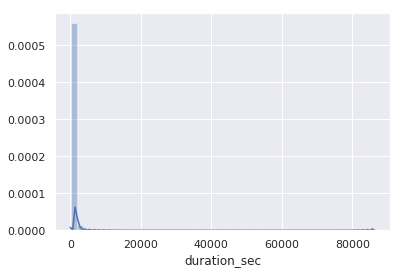

In [22]:
sns.distplot(df.duration_sec);

/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


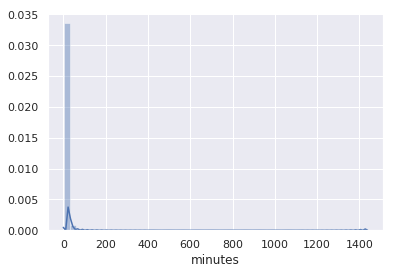

In [23]:
sns.distplot(df.minutes)

/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(50, 3000)

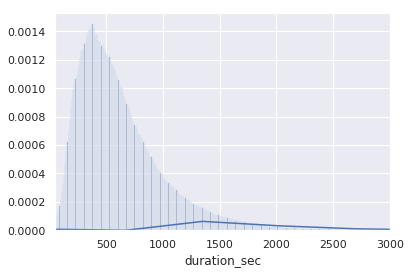

In [24]:
bins = np.arange(50 , 3500 , 10)
ax = sns.distplot(df.duration_sec, bins=bins);
ax.set_xlim([50,3000])

### Most commonly people rent a bike for around 400-500 seconds but there is no clear cut indication

In [25]:
dict_start_station =  dict(df.start_station_name.value_counts()[0:10])

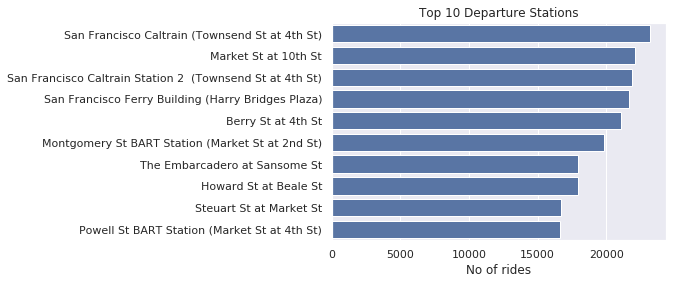

In [26]:
color = sns.color_palette()[0]
sns.barplot(color=color, y= list(dict_start_station.keys()), x = list(dict_start_station.values()))
plt.title('Top 10 Departure Stations');
plt.xlabel('No of rides');

In [27]:
dict_end_station =  dict(df.end_station_name.value_counts()[0:10])

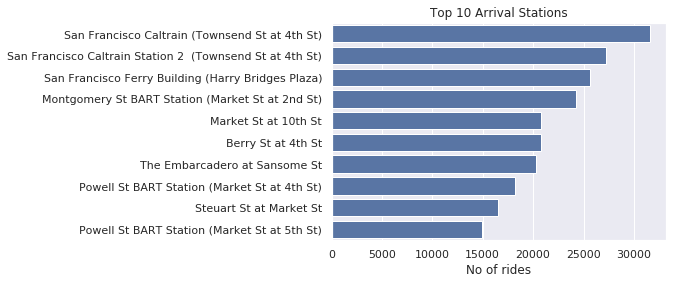

In [28]:
color = sns.color_palette()[0]
sns.barplot(color=color, y= list(dict_end_station.keys()), x = list(dict_end_station.values()))
plt.title('Top 10 Arrival Stations')
plt.xlabel('No of rides');

### San Francisco Caltrain (Townsend St at 4th St) is the busiest station in terms of pick ups and drops

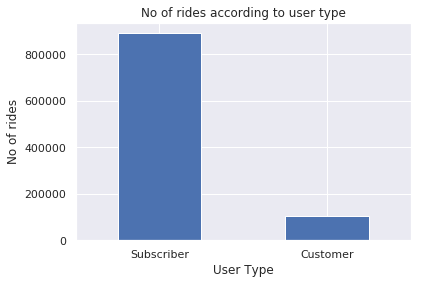

In [29]:
df['user_type'].value_counts().plot(kind='bar', color=color)
plt.xticks(Rotation=0)
plt.title('No of rides according to user type');
plt.xlabel('User Type')
plt.ylabel('No of rides');

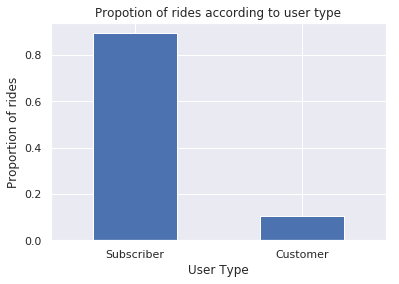

In [30]:
df['user_type'].value_counts(normalize =True).plot(kind='bar', color=color)
plt.xticks(Rotation=0);
plt.title('Propotion of rides according to user type');
plt.xlabel('User Type')
plt.ylabel('Proportion of rides');

### Around 85 % of the users are subscribers and 15% are customers as of end of June 2018

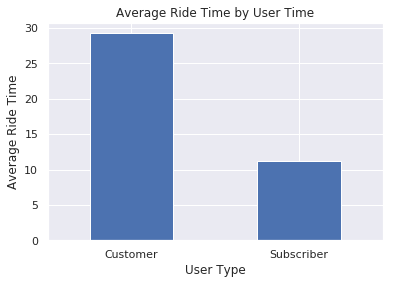

In [79]:
#df['user_type'].value_counts(normalize =True).plot(kind='bar', color=color)
df.groupby('user_type').minutes.mean().plot(kind='bar', color=color)
plt.xticks(Rotation=0);
plt.title('Average Ride Time by User Time');
plt.xlabel('User Type')
plt.ylabel('Average Ride Time');

In [31]:
## adding new variables to do analysis on time

df['s_time'] = df['start_time'].dt.time
df['start_date'] = df['start_time'].dt.date
df['start_month'] = df['start_time'].dt.month
df['start_weekday'] =df['start_time'].dt.dayofweek

In [32]:
df['e_time'] = df['end_time'].dt.time
df['end_date'] = df['end_time'].dt.date
df['end_month'] = df['end_time'].dt.month
df['end_weekday'] =df['end_time'].dt.dayofweek

In [33]:
df['start_hour'] = df['start_time'].dt.hour
df['end_hour'] = df['end_time'].dt.hour
df['start_time_year_month']=df['start_time'].map(lambda x: x.strftime('%Y-%m'))

In [34]:
df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,start_date,start_month,start_weekday,e_time,end_date,end_month,end_weekday,start_hour,end_hour,start_time_year_month
0,96,NA,80110,43,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.245,1987.0,Male,...,2017-12-31,12,6,15:12:50.245000,2018-01-01,1,0,16,15,2017-12
1,88,NA,78800,96,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.617,1965.0,Female,...,2017-12-31,12,6,13:49:55.617000,2018-01-01,1,0,15,13,2017-12
4,3167,NA,43603,247,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.571,1997.0,Female,...,2017-12-31,12,6,02:29:57.571000,2018-01-01,1,0,14,2,2017-12
6,3539,NA,4507,259,37.866249,-122.299371,Addison St at Fourth St,2018-01-01 01:04:35.619,1991.0,Female,...,2017-12-31,12,6,01:04:35.619000,2018-01-01,1,0,23,1,2017-12
12,2311,NA,2183,24,37.789677,-122.390428,Spear St at Folsom St,2018-01-01 00:29:18.743,1990.0,Male,...,2017-12-31,12,6,00:29:18.743000,2018-01-01,1,0,23,0,2017-12


In [35]:
df.start_weekday = df.start_weekday.map({0:'Mon', 1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
df.start_weekday = pd.Categorical(df.start_weekday, categories=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'], ordered=True)

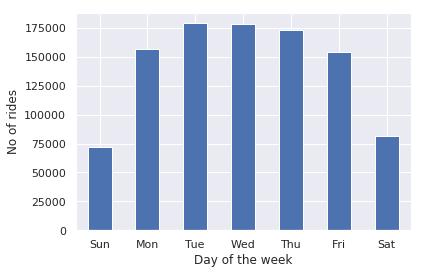

In [36]:
plt.xlabel('Day of the week')
plt.ylabel('No of rides');
df.start_weekday.value_counts().sort_index().plot(kind='bar', color=color);
plt.xticks(rotation=0);


In [37]:
df.end_weekday = df.end_weekday.map({0:'Mon', 1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
df.end_weekday = pd.Categorical(df.end_weekday, categories=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

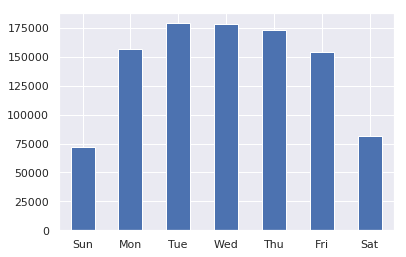

In [38]:
df.end_weekday.value_counts().sort_index().plot(kind='bar', color=color);
plt.xticks(rotation=0)

### Sunday seems to be the most quiet day in terms of rides followed by Saturday. While Weekdays see most of the rides. Maybe people are taking rides on Weekdays to office

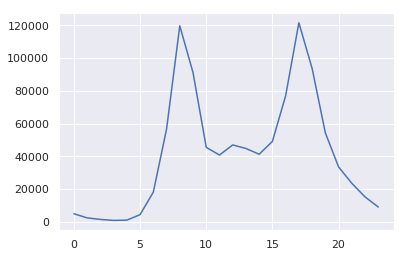

In [39]:
bins = np.arange(0,26,2)
df.start_hour.value_counts(sort=False).plot()

/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


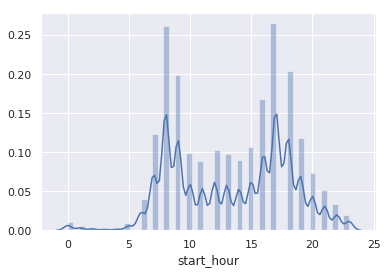

In [40]:
sns.distplot(df.start_hour);

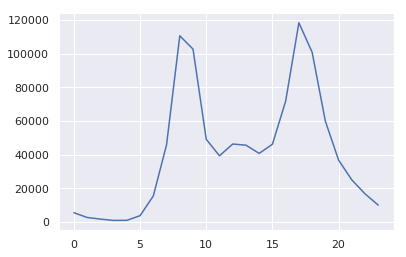

In [41]:
df.end_hour.value_counts(sort = False).plot()

/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


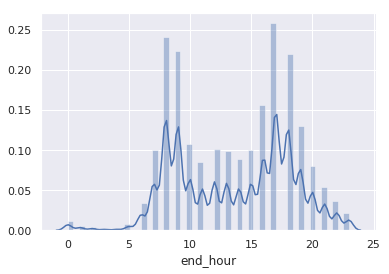

In [42]:
sns.distplot(df.end_hour);

## Peak time for the business is from 7-9 Hours in morning and 17-18 hours in the evening. This also shows that there is less or almost no business between 00:00 Hours to 5:00 Hours

In [43]:
df.start_month = pd.Categorical(df.start_month, categories=[6,7,8,9,10,11,12,1,2,3,4,5])

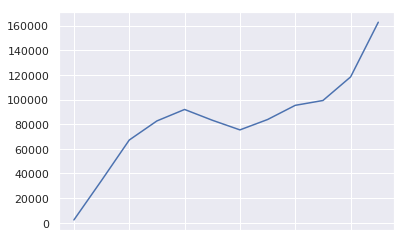

In [44]:
df.start_month.value_counts().sort_index().plot()

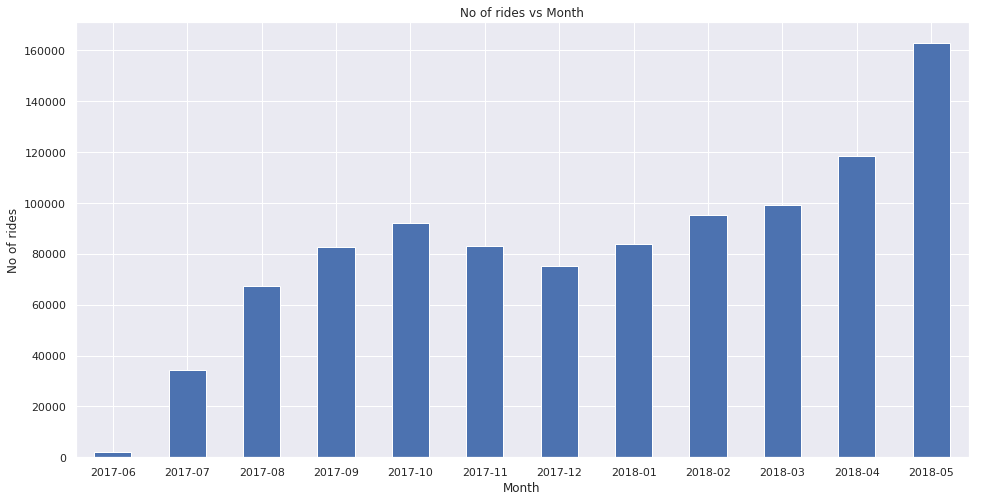

In [45]:
fig, ax = plt.subplots(figsize=(16,8))
df.start_time_year_month.value_counts().sort_index().plot(kind='bar', color=color)
plt.xticks(rotation=0);
plt.title('No of rides vs Month')
plt.xlabel('Month')
plt.ylabel('No of rides');

## Downward trend in November and Decemeber is interesting, while Decemeber being the holiday season, the sales should be  more. Oh!! I completely forgot there is a snow factor here so in November and Decemeber maybe weather costed the business badly?

## Since the start of the year the business has grown in double if we compare the number of rides

In [46]:
## adding new variable to calculate how much distance is covered by bike

df['distance']= 0

In [47]:
def calculate_distance(row):
    lat1, lon1 = row.start_station_latitude, row.start_station_longitude
    lat2, lon2 = row.end_station_latitude,row.end_station_longitude
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    row.distance = d
    return row

In [48]:
df = df.apply(calculate_distance, axis=1)

In [49]:
df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,start_month,start_weekday,e_time,end_date,end_month,end_weekday,start_hour,end_hour,start_time_year_month,distance
0,96,NA,80110,43,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.245,1987.0,Male,...,12,Sun,15:12:50.245000,2018-01-01,1,Mon,16,15,2017-12,0.942931
1,88,NA,78800,96,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.617,1965.0,Female,...,12,Sun,13:49:55.617000,2018-01-01,1,Mon,15,13,2017-12,3.069727
4,3167,NA,43603,247,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.571,1997.0,Female,...,12,Sun,02:29:57.571000,2018-01-01,1,Mon,14,2,2017-12,0.636339
6,3539,NA,4507,259,37.866249,-122.299371,Addison St at Fourth St,2018-01-01 01:04:35.619,1991.0,Female,...,12,Sun,01:04:35.619000,2018-01-01,1,Mon,23,1,2017-12,0.000000
12,2311,NA,2183,24,37.789677,-122.390428,Spear St at Folsom St,2018-01-01 00:29:18.743,1990.0,Male,...,12,Sun,00:29:18.743000,2018-01-01,1,Mon,23,0,2017-12,1.517348


/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


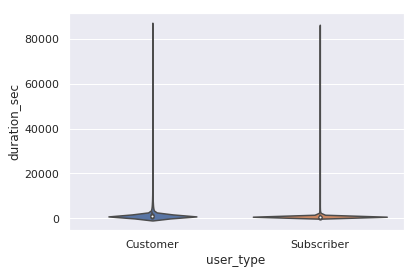

In [50]:
sns.violinplot(x = df.user_type, y= df.duration_sec);

### Violin plot does not specifies clearly, we will try some other type of plot

/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


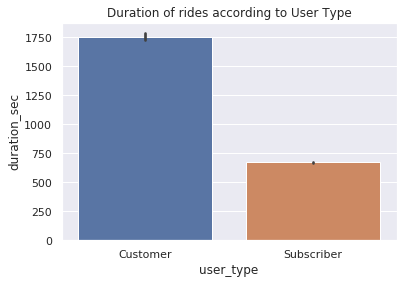

In [51]:
sns.barplot(x = df.user_type, y=df.duration_sec)
plt.title('Duration of rides according to User Type');

### A customer takes a longer ride than a subscriber on Average

In [52]:
df_month_user = df.groupby(['start_time_year_month','user_type']).duration_sec.mean().reset_index()
#df_month_user.start_month = pd.Categorical(df_month_user.start_month, categories=[6,7,8,9,10,11,12,1,2,3,4,5])
#df_month_user.sort_values('start_month');

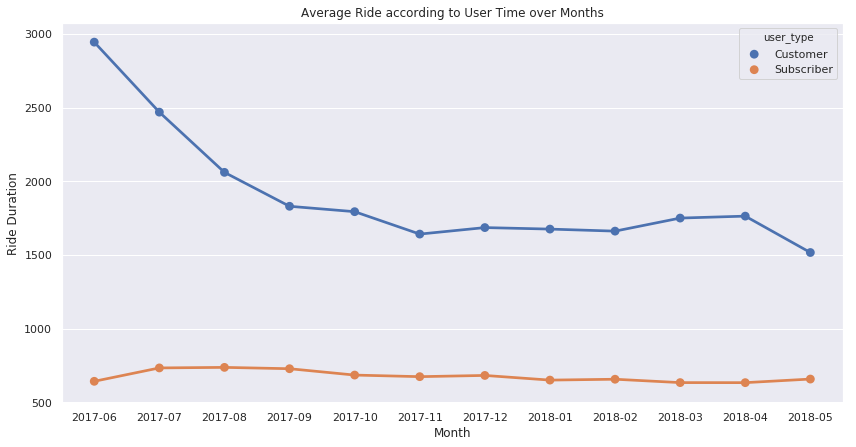

In [53]:
fig, ax = plt.subplots(figsize=(14,7))
sns.pointplot(x= df_month_user.start_time_year_month, y = df_month_user.duration_sec, hue=df_month_user.user_type,  data = df_month_user);
plt.title('Average Ride according to User Time over Months')
plt.xlabel('Month')
plt.ylabel('Ride Duration');

### The average ride time of a customer has decreased by 50% while for the subscriber it remains roughly the same between 500-750 seconds

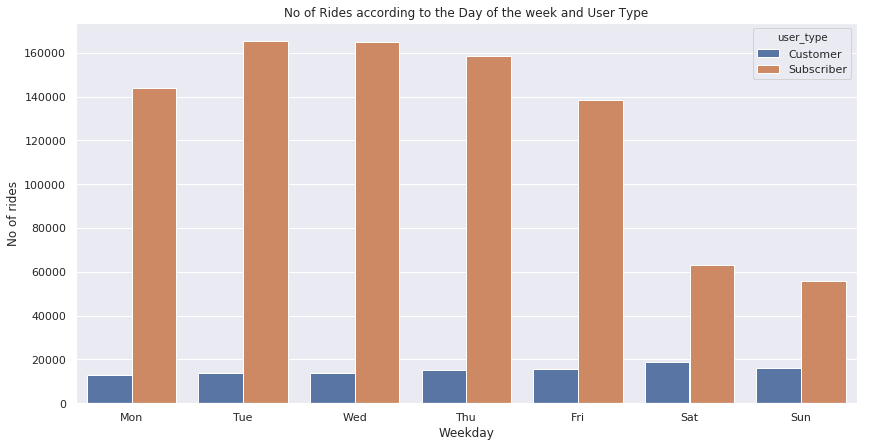

In [54]:
fig, ax = plt.subplots(figsize=(14,7))
sns.countplot(df.start_weekday, hue=df.user_type,order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('No of Rides according to the Day of the week and User Type')
plt.xlabel('Weekday')
plt.ylabel('No of rides');

In [55]:
### On Saturday and Sunday the no of rides taken by Customers are marginally higher

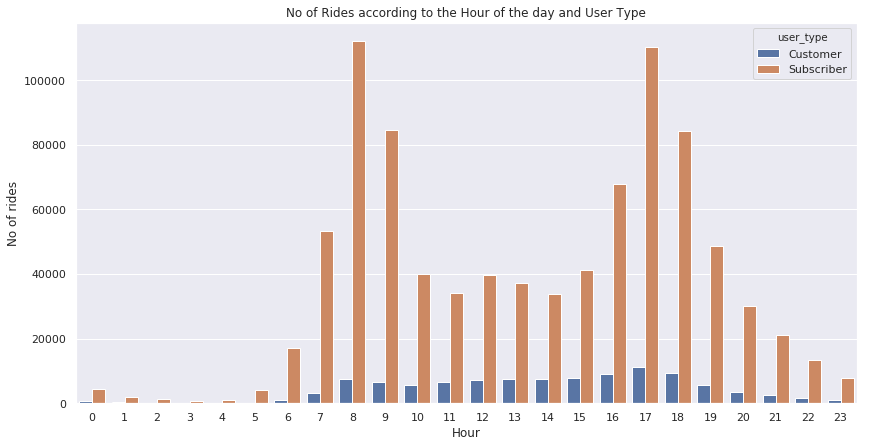

In [56]:
fig, ax = plt.subplots(figsize=(14,7))
sns.countplot(df.start_hour, hue=df.user_type)
plt.title('No of Rides according to the Hour of the day and User Type')
plt.xlabel('Hour')
plt.ylabel('No of rides');

### Trend is same as that of the normal type

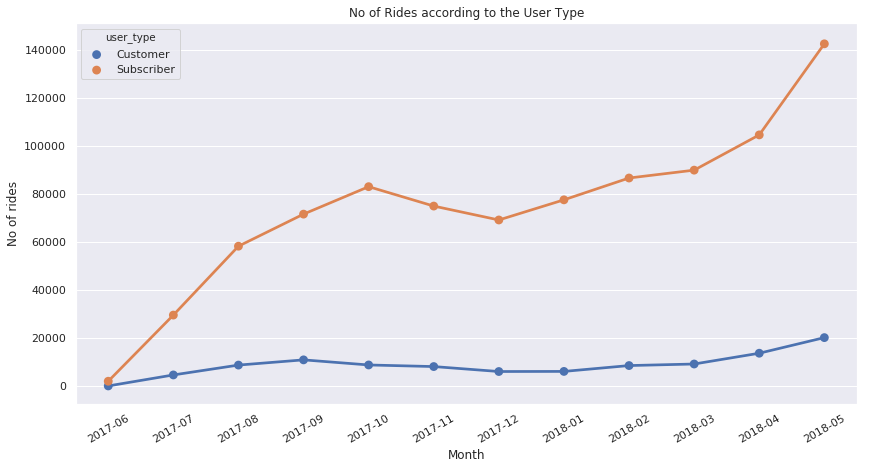

In [58]:
fig, ax = plt.subplots(figsize=(14,7))
df_modified = df.groupby(['user_type','start_time_year_month']).bike_id.size().reset_index()
sns.pointplot(x = df_modified.start_time_year_month, y= df_modified.bike_id, hue=df_modified.user_type)
plt.xticks(rotation=30);
plt.title('No of Rides according to the User Type')
plt.xlabel('Month')
plt.ylabel('No of rides');

## Number of subscribers is 7 times currently as that of the customers

In [59]:
df.age_cat=''

In [60]:
def apply_age_group(row):
    
    if(row >0 and row<=10):
        row = '0-10'
    elif(row > 10 and row<=20):
        row = '11-20'
    elif(row > 20 and row<=30):
        row = '21-30'
    elif(row > 30 and row<=40):
        row = '31-40'
    elif(row > 40 and row<=50):
        row = '41-50'
    elif(row > 50 and row<=60):
        row = '51-60'
    return row

In [61]:
df.age = df.age.apply(apply_age_group)

In [62]:
df.age.nunique()

5

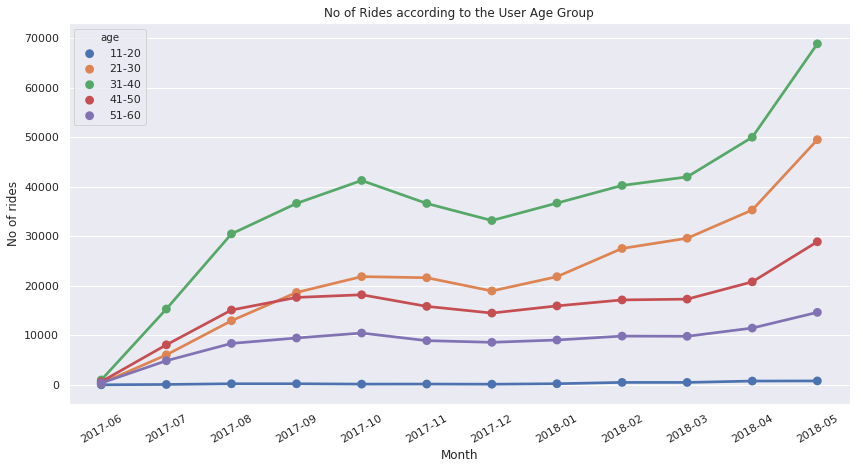

In [63]:
fig, ax = plt.subplots(figsize=(14,7))
df_age_month = df.groupby(['age','start_time_year_month']).bike_id.size().reset_index()
sns.pointplot(x = df_age_month.start_time_year_month, y= df_age_month.bike_id, hue=df_age_month.age)
plt.xticks(rotation=30);

plt.title('No of Rides according to the User Age Group')
plt.xlabel('Month')
plt.ylabel('No of rides');

### Looks like the service is most famous amongst age group of 21-40 and that supports our claim that bikes are mostly used  by the people in Office

In [64]:
test_df = df[df.start_hour>5]
df_week_hour = test_df.groupby(['start_weekday','start_hour']).bike_id.size().reset_index()
df_week_hour.start_weekday = pd.Categorical(df_week_hour.start_weekday, categories=['Mon', 'Tue','Wed','Thu','Fri','Sat','Sun'])
df_week_hour.sort_values(['start_weekday', 'start_hour'])

,start_weekday,start_hour,bike_id
18,Mon,6,3188
19,Mon,7,9926
20,Mon,8,21373
21,Mon,9,15917
22,Mon,10,6431
23,Mon,11,5127
24,Mon,12,6035
25,Mon,13,5719
26,Mon,14,5070
27,Mon,15,6326


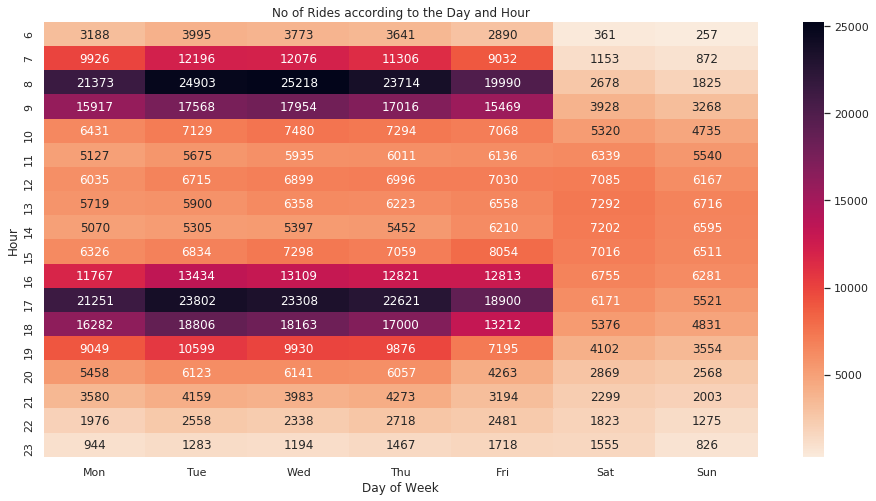

In [65]:
fig, ax= plt.subplots(figsize=(16,8))
flights = df_week_hour.pivot_table(index='start_hour', columns='start_weekday', values='bike_id')
cmap = sns.cm.rocket_r
sns.heatmap(flights,fmt='d', annot=True, cmap=cmap, annot_kws={"size": 12})
plt.title('No of Rides according to the Day and Hour')
plt.xlabel('Day of Week')
plt.ylabel('Hour');

In [66]:
## This confirms our guess that most rides takes place between 17-18 Hours and 8-9 Hours on Tuesday and Wednesday 

Text(0, 0.5, 'No of bikes')

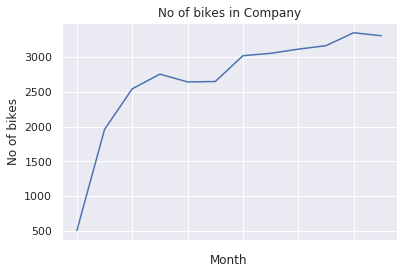

In [67]:
df.groupby(['start_time_year_month']).bike_id.nunique().plot()
plt.title('No of bikes in Company')
plt.xlabel('Month')
plt.ylabel('No of bikes')

### The company started with 500 bikes and now has close to 3300 bikes at the moment

In [68]:
## average rides per bike

In [69]:
t1= df.groupby(['start_time_year_month']).bike_id.nunique().rename(columns = {'bike_id':'bike_number'})

In [70]:
t1 = t1.reset_index().rename(columns = {'start_time_year_month':'month',0:'bike_number'})

In [71]:
t2 =df.groupby(['start_time_year_month']).bike_id.count().rename(columns = {'bike_id':'bike_count'})

In [72]:
t2 = t2.reset_index().rename(columns = {'start_time_year_month':'month_1',0:'bike_count'})

In [73]:
final_df = pd.concat([t1, t2], axis=1)

In [74]:
final_df['avg'] = final_df.bike_count / final_df.bike_number

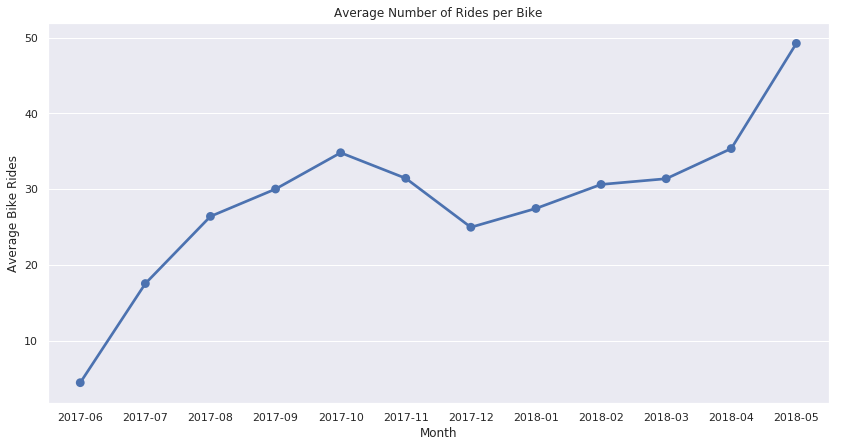

In [75]:
fig, ax= plt.subplots(figsize=(14,7))
sns.pointplot(final_df.month, final_df.avg)
plt.title('Average Number of Rides per Bike')
plt.xlabel('Month')
plt.ylabel('Average Bike Rides');

### The Average Number of Rides per bike decreased in November and December due to SNOW bu it increased drastically from the new year onwards. Maybe the launch of Shared Bikes in January shoot this up.

## Step 4: Conclusion

Generally around 90% of the bike rides take place on weekdays with Tuesday and Wednesday being the most busiest days. Also, people in the age group 21-40 generally use the bikes. The peak Bike ride time is around 7AM - 9AM in the morning and 5PM -6PM in the evening which matches the commute time for people working in 9-5 job. So considering all this, the target audience for Ford Go Bike is a regular 9-5 job person aged between 20-40 who is working in some sort of startup or tech company. 

Coming back to Bike Rides 85% of the Bike Rides are from subscribers and rest 15% from Customers. Average Bike Ride for a Subscriber is of 11 minutes and for a customer is around 28 minutes. The customer base is one-seventh as compared to the subscribers as of June 2019. Subscribers mostly ride on weekdays and this supports our assumption of a person aged between 20-40 going in to work for some tech company. While on the weekends, the rides by Customers are more as compared to Subscribers which means that the people are either trying out the service provided or it is just for hobby purpose.

As of June 2018, the average number of Bike rides per bike increased close to twice as compared to on New Year's day. Also the number of bikes grow 6 times since the company launched its service in June 2017. Also, if you are in San Francisco Caltrain (Townsend St at 4th St) you are in one of the busiest stations.